# Exponentially weighted average for an X and Y plot

This script has several functions:

- Estimate an exponentially weighted average for
    abscissa, ordinate = integer, float
- Estimate an exponentially weighted average for
    abscissa, ordinate = datetime, float
- Plot the raw data as a scatter plot
- Plot the exponentially weighted average as a line plot

In [1]:
from typing import Tuple
import matplotlib.axes as axes
import matplotlib.cm as cm
from matplotlib.dates import DateFormatter, DayLocator
from matplotlib.ticker import NullFormatter, NullLocator
import matplotlib.pyplot as plt
import pandas as pd
import datasense as ds

In [2]:
c = cm.Paired.colors
alpha_value = 1.0
function = 'mean'
parser = '%Y-%m-%d %H:%M:%S'
file_name = [
    'raw_data_integer_float.csv',
    'raw_data_datetime_float.csv'
]
abscissa_name = ['abscissa', 'datetime']
ordinate_name = ['ordinate', 'observed']
ordinate_predicted_name = [
    'ordinate_predicted',
    'ordinate_predicted'
]
graph_file_name = [
    'exponentially_weighted_average_integer_float',
    'exponentially_weighted_average_datetime_float'
]
date_time_parser = [None, parser]
date_formatter = [None, '%m-%d']
column_names_sort = [False, False]
figure_width_height = (8, 6)
x_axis_label = 'Abscissa'
y_axis_label = 'Ordinate'
axis_title = 'Exponentially Weighted Average'
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [3]:
def main():
    for (
        filename,
        abscissaname,
        ordinatename,
        ordinatepredictedname,
        datetimeparser,
        columnnamessort,
        dateformatter,
        graphfilename
    ) in zip(
        file_name,
        abscissa_name,
        ordinate_name,
        ordinate_predicted_name,
        date_time_parser,
        column_names_sort,
        date_formatter,
        graph_file_name
    ):
        data = ds.read_file(
            filename,
            abscissaname,
            datetimeparser,
            columnnamessort
        )
        data[ordinatepredictedname] = data[ordinatename]\
            .ewm(alpha=alpha_value).mean()
        plot_graph(
            data,
            abscissaname,
            ordinatename,
            ordinatepredictedname,
            figure_width_height,
            dateformatter,
            graphfilename,
            axis_title,
            x_axis_label,
            y_axis_label
        )

In [4]:
def despine(ax: axes.Axes) -> None:
    '''
    Remove the top and right spines of a graph.

    There is only one x axis, on the bottom, and one y axis, on the left.
    '''
    for spine in 'right', 'top':
        ax.spines[spine].set_visible(False)

In [5]:
def plot_graph(
    df: pd.DataFrame,
    columnx: str,
    columny: str,
    columnz: str,
    figurewidthheight: Tuple[int, int],
    dateformat: str,
    graphname: str,
    graphtitle: str,
    xaxislabel: str,
    yaxislabel: str
) -> None:
    fig = plt.figure(figsize=figurewidthheight)
    ax = fig.add_subplot(111)
    ax.plot(
        df[columnx],
        df[columny],
        marker='.',
        linestyle='',
        color=c[1]
    )
    ax.plot(
        df[columnx],
        df[columnz],
        marker=None,
        linestyle='-',
        color=c[5]
    )
    if dateformat:
        ax.xaxis.set_major_locator(DayLocator())
        ax.xaxis.set_minor_locator(NullLocator())
        ax.xaxis.set_major_formatter(DateFormatter(dateformat))
        ax.xaxis.set_minor_formatter(NullFormatter())
    ax.set_title(graphtitle, fontweight='bold')
    ax.set_xlabel(xaxislabel, fontweight='bold')
    ax.set_ylabel(yaxislabel, fontweight='bold')
    despine(ax)
    ax.figure.savefig(f'{graphname}.svg', format='svg')

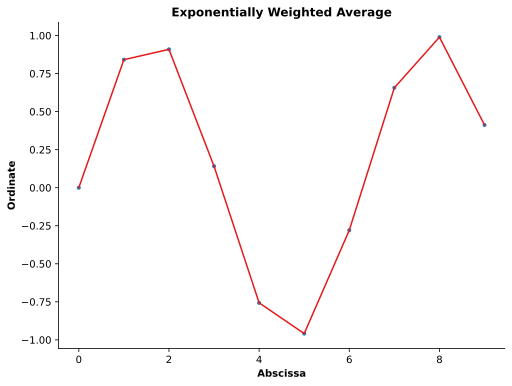

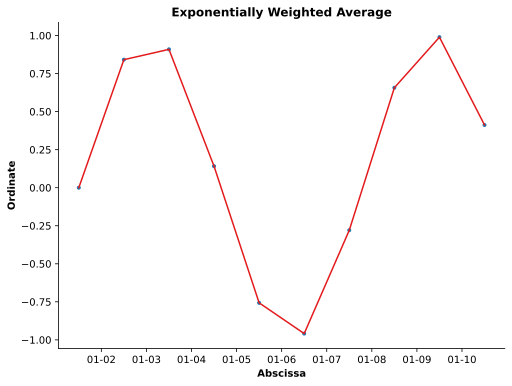

In [6]:
if __name__ == '__main__':
    main()